<a href="https://colab.research.google.com/github/ybressler/Web-Scraping/blob/master/Web%20Scraping%20Overview%20%E2%80%93%20NYC%20Python%20Meetup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping – NYC Python Meetup
from https://github.com/ybressler/Web-Scraping/blob/master/Web%20Scraping%20Overview%20%E2%80%93%20NYC%20Python%20Meetup.ipynb

---


In [4]:
# These should all be installed. If they're not, pip install them by entering the following into a cell:
# !pip install <package name>

# Core python
import os
import json
import re
import datetime
from collections import Counter

# Web scraping
import requests
import urllib
from bs4 import BeautifulSoup 
from pprint import pprint

## pandas
import numpy as np
import pandas as pd


# Basic Stuff

In [15]:
url = "https://www.meetup.com/nycpython/"

r = requests.get(url)
html = r.text
soup = BeautifulSoup(html, 'html.parser')


# Store all the things I'm scraping
records = {}

NameError: name 'requests' is not defined

## Title

In [56]:
records = {}

# Try to find it in the soup
tag_name = "title" 

result = soup.head.find(tag_name)

if not result:
    result = soup.find("meta",  property=f"og:{tag_name}")
    result = result.get("content")
    
else:
    result = result.text

records.update(
    {tag_name: result}
)

print(records)

{'title': 'The New York Python Meetup Group (New York, NY) | Meetup'}


## Description

In [57]:
# Try to find it in the soup
tag_name = "description" 

result = soup.head.find(tag_name)

if not result:
    result = soup.find("meta",  property=f"og:{tag_name}")
    result = result.get("content")
    
else:
    result = result.text

records.update(
    {tag_name: result}
)
records

{'title': 'The New York Python Meetup Group (New York, NY) | Meetup',
 'description': 'Meet other local Python Programming Language enthusiasts!'}

## Some Creepy Stuff

### new_relic_tracking

In [58]:
new_relic_tracking = "nr-data.net"

In [59]:
creepy_script = "https://bam.nr-data.net/1/74dcd635da?a=153043785&amp;v=1167.2a4546b&amp;to=YlwAbEtRV0VWVBJQCVsWLFdLXVhaXk0DXTNHUE0CTEJVWFZaAw%3D%3D&amp;rst=6985&amp;ref=https://www.meetup.com/nycpython/&amp;ap=2389.297138&amp;be=2727&amp;fe=6932&amp;dc=3741&amp;tt=fe428349575618&amp;af=err,xhr,stn,ins,spa&amp;perf=%7B%22timing%22:%7B%22of%22:1581551747585,%22n%22:0,%22f%22:4,%22dn%22:6,%22dne%22:25,%22c%22:25,%22s%22:44,%22ce%22:75,%22rq%22:76,%22rp%22:2657,%22rpe%22:2706,%22dl%22:2669,%22di%22:3741,%22ds%22:3742,%22de%22:3742,%22dc%22:6932,%22l%22:6932,%22le%22:6957%7D,%22navigation%22:%7B%7D%7D&amp;fp=3216&amp;fcp=3216&amp;ja=%7B%22timeToAppInteractive%22:4221.2949999957345%7D&amp;jsonp=NREUM.setToken"
creepy_query = urllib.parse.urlparse(creepy_script).query
# creepy_query = urllib.parse.unquote(creepy_query)

creepy_all_stuff = urllib.parse.parse_qs(creepy_query)

creepy_perf = json.loads(creepy_all_stuff.get("perf", ["{}"])[0])
creepy_perf_timing = creepy_perf.get("timing", {}).get("of", None)
creepy_perf_timing_dt = datetime.datetime.fromtimestamp(creepy_perf_timing/1000) if creepy_perf_timing else None

creepy_perf_timing_dt

datetime.datetime(2020, 2, 12, 18, 55, 47, 585000)

In [60]:
pattern = re.compile(new_relic_tracking)

# Trying to find this:
soup.head.find_all(text=pattern)

['window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"74dcd635da","applicationID":"153043785","applicationTime":1155.591843,"transactionName":"YlwAbEtRV0VWVBJQCVsWLFdLXVhaXk0DXTNHUE0CTEJVWFZaAw==","queueTime":0,"ttGuid":"1d8d3e5c4811","agentToken":null}; (window.NREUM||(NREUM={})).loader_config={xpid:"VQQEWVFTCBABUVJSAwIAXlE=",licenseKey:"74dcd635da",applicationID:"153043785"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(25),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o

## Links and Stuff

In [77]:
all_links = soup.find_all("a")

records.update({"n_links":len(all_links)})

records

{'n_links': 69}

In [78]:
# We want the hrefs from the soup objects:
all_links_href = [x.get("href",None) for x in all_links]

In [79]:
# Get social media links
pattern = re.compile("(facebook|youtube|instagram|twitter|medium)")

for href in all_links_href:
    if len(pattern.findall(href))>0:
        account = pattern.findall(href)[0]
        records.update({account:href})
        
records

{'n_links': 69,
 'twitter': 'https://twitter.com/Meetup/',
 'facebook': 'https://www.facebook.com/meetup/',
 'youtube': 'https://www.youtube.com/meetup',
 'instagram': 'https://www.instagram.com/meetup/',
 'medium': 'https://medium.com/meetup'}

# To do: Scale

To do:

* compile all functions into a single function which ingests a url and spits out a record for the things.
* structure records into a pandas dataframe
* make a single data observation >> data visualization from your findings

We will do:
* find more creepy stuff!

# My stuff

In [17]:
urls =  ["https://www.meetup.com/nycpython", "https://www.eventbrite.com/d/ny--new-york/python/"]
tags =  ["title", "description"]
links = ["facebook","youtube","instagram","twitter","medium"]
soups = []
records = {}

## functions

### get_scripts_data

In [18]:
def get_scripts_data(soup):
    records={}
    records["scripts"]=[]

    scripts_list = soup.find_all("script")
    records.update({"n_scripts":len(scripts_list)})
    
    # We want the hrefs from the soup objects:
    all_scripts_src = [x.get("src",None) for x in scripts_list]
    
    for script_src in all_scripts_src:
        if script_src:
            records["scripts"].append(script_src)

    return records
    

### get_links_data

In [19]:
def get_links_data(soup, accounts:list):
    records={}
    records["links"]={}

    all_links = soup.find_all("a")
    records.update({"n_links":len(all_links)})
    
    # We want the hrefs from the soup objects:
    all_links_href = [x.get("href",None) for x in all_links]
    
    # Get social media links
    p = "|".join(accounts)
    pattern = re.compile(f"({p})")
    accounts_counter = Counter()
    for href in all_links_href:
        if href:
            res = pattern.findall(href)
            if len(res)>0:
                account = res[0]
                records["links"].update({account:href})

    return records


### get_tag_content

In [20]:
def get_tag_content(soup, tag_name:str):
    """Get the content of tag_name in the given soup and return a str"""
    
    content = ""
    result = soup.head.find(tag_name)
    if not result:
        result = soup.find("meta",  property=f"og:{tag_name}")
        content = result.get("content")
    else:
        content = result.text

    # remove extra white space 
    content = re.sub(' +', ' ',content.strip())

    return content

### get_data

In [43]:
def get_data_from(urls:list, tag_names:list, accounts:list):
    urls_records = {}
    
    # process urls
    for url in urls:
        # get raw html
        url_records = {}
        r = requests.get(url)
        html = r.text if r else ""
        
        # get soup from html
        soup = BeautifulSoup(html, 'html.parser')
        
        # get tag content for each tag
        for tag_name in tag_names:
            url_records.update( {tag_name: get_tag_content(soup, tag_name)} )
        
        # get social media and link info
        url_records.update(get_links_data(soup,accounts))
    
        # get javascripts data
        url_records.update(get_scripts_data(soup))

        # store the data
        urls_records[url]=url_records
        
    return urls_records

## data

In [44]:
data = get_data_from(urls,tags,links)


### print data

In [49]:
for d in data:
    print(d)
    for  i in data[d]:
        print(f"\t{i:15s}: {data[d][i]}")

data.keys()

https://www.meetup.com/nycpython
	title          : The New York Python Meetup Group (New York, NY) | Meetup
	description    : Meet other local Python Programming Language enthusiasts!
	links          : {'twitter': 'https://twitter.com/Meetup/', 'facebook': 'https://www.facebook.com/meetup/', 'youtube': 'https://www.youtube.com/meetup', 'instagram': 'https://www.instagram.com/meetup/', 'medium': 'https://medium.com/meetup'}
	n_links        : 69
	scripts        : ['https://cdn.polyfill.io/v2/polyfill.min.js?features=default-3.6,fetch,Intl,Intl.~locale.en-US,Array.prototype.find,Array.prototype.includes,Object.values&flags=gated', '/mu_static/react.ddd38c26.js', '/mu_static/vendor.8820b893.js', '/mu_static/en-US/app.3aa764a4.js']
	n_scripts      : 15
https://www.eventbrite.com/d/ny--new-york/python/
	title          : New York, NY Python Events | Eventbrite
	description    : Lining up plans in New York? Whether you're a local, new in town, or just passing through, you'll be sure to find so

dict_keys(['https://www.meetup.com/nycpython', 'https://www.eventbrite.com/d/ny--new-york/python/'])

### build panda dataframe

In [53]:
df = pd.DataFrame({
    'URL':      np.array([x for x in data.keys()]),
    'n_links':  np.array([data[x]["n_links"] for x in data.keys()]),
    'n_scripts':  np.array([data[x]["n_scripts"] for x in data.keys()])
})

df

,URL,n_links,n_scripts
0,https://www.meetup.com/nycpython,69,15
1,https://www.eventbrite.com/d/ny--new-york/python/,151,17


### plot dataframe

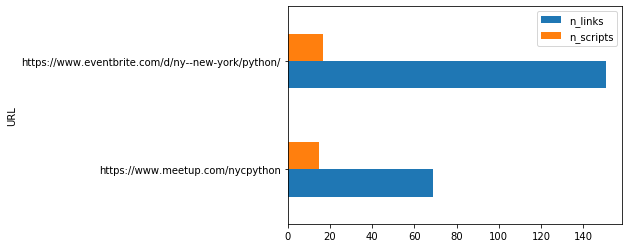

In [55]:
df.plot.barh(x='URL', rot=0, stacked=False)


In [284]:

soups=[]
pages = [x for x in range(7)][1:]  # pages 1 thru 6

for page in pages:
    url=f"https://www.broadway.com/shows/tickets/?page={page}"
    r = requests.get(url)
    html = r.text if r else ""
    soups.append(BeautifulSoup(html, 'html.parser'))

In [285]:
show_records={}
print("grabbing shows....")
for soup in soups:
    all_shows = soup.find("div", attrs={"data-qa":"fas-results"})
    shows_links = all_shows.find_all("a", attrs={"class":"link-111-111"})
    for show in shows_links:
        show_name = re.sub(' +', ' ',show.get_text().strip())
        show_href = show.get("href")
        r = requests.get(f"https://www.broadway.com{show_href}")
        show_html = r.text if r else ""
        show_soup=BeautifulSoup(show_html, 'html.parser')
        show_records.update({show_name:{"name":show_name, "soup":show_soup}})
print(f"grabbed {len(show_soups)} shows...")

grabbing shows....
grabbed 110 shows...


In [288]:
def get_theater_capacity(url):
    if not url:
        return 0
    if "/" == url[0]:
        url = "https://www.broadway.com" + url
    r = requests.get(url)
    html = r.text if r else ""
    soup = BeautifulSoup(html, 'html.parser')
    capacity = soup.find("div", attrs={"data-qa":"left-rail-capacity-amount"})
    if capacity:
        capacity = int(capacity.get_text())
    return capacity

In [296]:
for key in show_records.keys():
    show = show_records[key]
    show_name = show["name"]
    show_soup = show["soup"]
    #span class="rspButtonBox__ticketValue"
    show_price = show_soup.find("span", attrs={"class":"rspButtonBox__ticketValue"})
    if show_price:
        show_price = str(show_price.get_text().strip().replace("$",""))
        show_price = float(show_price)
    else :
        show_price = np.NaN
    #li data-qa="category-list"
    show_categories = show_soup.find_all("li", attrs={"data-qa":"category-list"})
    if show_categories == None:
        show_categories = []
    
    # ul class="man"
    show_cast_list = show_soup.find("ul", attrs={"class":"man"})
    if show_cast_list:
        show_cast_list = show_cast_list.find_all("li")
        
    if show_cast_list == None:
        show_cast_list = []
        
    gross = 0
    show_theater_capacity=0
    show_theater_url = show_soup.find("a", attrs={"class":"rspHeroHeader__venue"})
    if show_theater_url:
        show_theater_url=show_theater_url.get("href")
        show_theater_capacity = get_theater_capacity(show_theater_url) 
        if show_theater_capacity and show_price and show_price > 0:
            gross = show_theater_capacity * show_price
    
    print(f"{show_name:40s}: ${show_price:>8.2f},  [{len(show_categories):10d}], ({len(show_cast_list)}), {show_theater_capacity}, gross: {gross}")
    show_records[key].update( {
        "price":show_price, 
        "n_categories":len(show_categories),
        "n_cast": len(show_cast_list),
        "capacity": show_theater_capacity,
        "gross": gross
    } )
    


Hamilton                                : $  199.00,  [         5], (10), 1380, gross: 274620.0
Wicked                                  : $   79.00,  [         6], (8), 1933, gross: 152707.0
The Phantom of the Opera                : $   29.00,  [         5], (10), 1607, gross: 46603.0
The Lion King                           : $   99.00,  [         5], (13), 1615, gross: 159885.0
To Kill a Mockingbird                   : $   39.00,  [         6], (14), 1468, gross: 57252.0
Beetlejuice                             : $   59.00,  [         3], (9), 1498, gross: 88382.0
Aladdin                                 : $   59.50,  [         6], (8), 1801, gross: 107159.5
Ain't Too Proud – The Life and Times of The Temptations: $   49.00,  [         4], (5), 1435, gross: 70315.0
The Book of Mormon                      : $   69.00,  [         5], (5), 1108, gross: 76452.0
Tina: The Tina Turner Musical           : $   59.00,  [         2], (5), 1509, gross: 89031.0
Chicago                              

DaVinci and Michelangelo: The Titans Experience: $   39.50,  [         2], (1), 174, gross: 6873.0
The Best We Could (a family tragedy)    : $   36.00,  [         2], (5), None, gross: 0
Metropolitan Opera: La Bohème           : $   39.50,  [         2], (3), 3800, gross: 150100.0
Exception to the Rule                   : $   30.00,  [         3], (2), 50, gross: 1500.0
Metropolitan Opera: La Cenerentola      : $   32.50,  [         2], (2), 3800, gross: 123500.0
Metropolitan Opera: Cosi Fan Tutte      : $   32.50,  [         2], (2), 3800, gross: 123500.0
Metropolitan Opera: Der Fliegende Holländer: $   39.50,  [         2], (6), 3800, gross: 150100.0
Metropolitan Opera: Madama Butterfly    : $   39.55,  [         2], (3), 3800, gross: 150290.0
Metropolitan Opera: Porgy and Bess      : $     nan,  [         2], (0), 3800, gross: 0
Metropolitan Opera: Manon Lescaut       : $   45.50,  [         2], (0), 3800, gross: 172900.0
Metropolitan Opera: Maria Stuarda       : $   38.50,  [      

# price of Bway show per cat-listed

In [291]:
k = [x for x in show_records.keys()][0]
show = show_records[k]

In [292]:
show.keys()

dict_keys(['name', 'soup', 'price', 'n_categories', 'n_cast', 'capacity', 'gross'])

In [297]:
df = pd.DataFrame({
    'name':      np.array([x for x in show_records.keys()]),
    'price':  np.array([show_records[x]["price"] for x in show_records.keys()]),
    'n_categories':  np.array([show_records[x]["n_categories"] for x in show_records.keys()]),
    'n_cast':  np.array([show_records[x]["n_cast"] for x in show_records.keys()]),
    'capacity': np.array([show_records[x]["capacity"] for x in show_records.keys()]),
    'gross': np.array([show_records[x]["gross"] for x in show_records.keys()])
})

df

,name,price,n_categories,n_cast,capacity,gross
0,Hamilton,199.0,5,10,1380,274620.0
1,Wicked,79.0,6,8,1933,152707.0
2,The Phantom of the Opera,29.0,5,10,1607,46603.0
3,The Lion King,99.0,5,13,1615,159885.0
4,To Kill a Mockingbird,39.0,6,14,1468,57252.0
...,...,...,...,...,...,...
105,Metropolitan Opera: La Traviata,39.5,2,6,3800,150100.0
106,Metropolitan Opera: Turandot,39.5,1,6,3800,150100.0
107,Metropolitan Opera: Werther,39.5,2,2,3800,150100.0
108,Metropolitan Opera: Agrippina,37.5,2,0,3800,142500.0


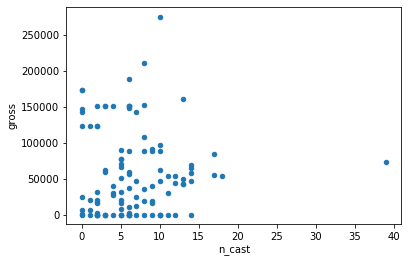

In [301]:
df.plot.scatter(x="n_cast",y="gross")

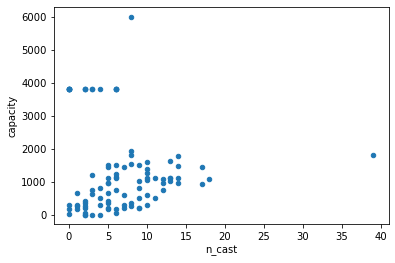

In [265]:
df.plot.scatter(x="n_cast",y="capacity")

In [305]:
filtered_df = df[df['n_categories'] != 0][df['n_cast'] != 0]
filtered_df = filtered_df[filtered_df['capacity']!=0]
filtered_df = filtered_df[filtered_df['gross']>0]



In [306]:
filtered_df

,name,price,n_categories,n_cast,capacity,gross
0,Hamilton,199.0,5,10,1380,274620.0
1,Wicked,79.0,6,8,1933,152707.0
2,The Phantom of the Opera,29.0,5,10,1607,46603.0
3,The Lion King,99.0,5,13,1615,159885.0
4,To Kill a Mockingbird,39.0,6,14,1468,57252.0
...,...,...,...,...,...,...
103,Metropolitan Opera: Simon Boccanegra,39.5,1,4,3800,150100.0
104,Metropolitan Opera: Tosca,49.5,2,6,3800,188100.0
105,Metropolitan Opera: La Traviata,39.5,2,6,3800,150100.0
106,Metropolitan Opera: Turandot,39.5,1,6,3800,150100.0


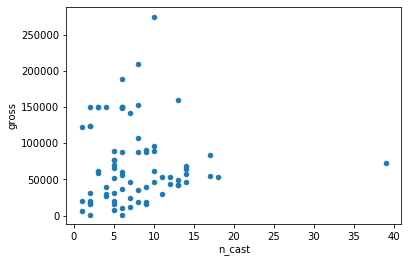

In [307]:
filtered_df.plot.scatter(x="n_cast",y="gross")

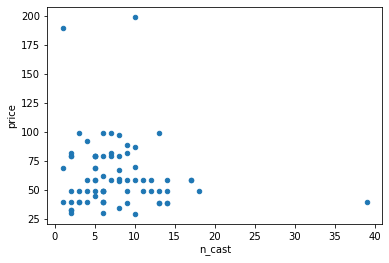

In [308]:
filtered_df.plot.scatter(x="n_cast",y="price")

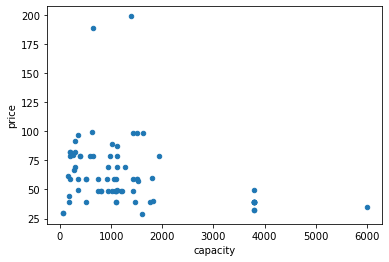

In [311]:
filtered_df.plot.scatter(x='capacity',y='price')

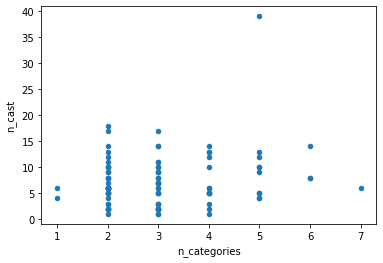

In [274]:
filtered_df.plot.scatter(x="n_categories",y="n_cast")

## get theater seats

In [275]:
[k for k in show_records.keys()][3]

'The Lion King'

In [276]:
soup = show_records[k]["soup"]

In [277]:
url = "https://www.broadway.com" + soup.find("a", attrs={"class":"rspHeroHeader__venue"}).get("href")
url

'https://www.broadway.com/venues/theaters/richard-rodgers-theatre/'

In [278]:
r = requests.get(url)
html = r.text if r else ""
soup = BeautifulSoup(html, 'html.parser')

In [279]:
capacity = soup.find("div", attrs={"data-qa":"left-rail-capacity-amount"})
if capacity:
    capacity = int(capacity.get_text())

In [280]:
capacity

1380

In [281]:
def get_theater_capacity(url):
    if not url:
        return 0
    r = requests.get(url)
    html = r.text if r else ""
    soup = BeautifulSoup(html, 'html.parser')
    capacity = soup.find("div", attrs={"data-qa":"left-rail-capacity-amount"})
    if capacity:
        capacity = int(capacity.get_text())
    return capacity
    